<img style = "float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width = "300" height = "500" /> 
    
    
### <font color = "navy"> Simulación de procesos financieros. <font> 

**Nombres:** Moises Flores Ortíz y Miriam Eunice Rosas Medellín.

**Fecha:** 28 de abril del 2021.

**Expediente**: 722183 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22
**Link al repositorio en Github**: https://github.com/Miriam1999/Tarea9_MFlores_MERosas

## Ejercicio 1

### Solución de Moises

### Solución de Miriam

In [1]:
# Librerías a usar
import datetime
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
import pandas_datareader.data as web
%matplotlib inline

# Algunas opciones para Pandas
pd.set_option("display.notebook_repr_html", True)
pd.set_option("display.max_columns", 6)
pd.set_option("display.max_rows", 10)
pd.set_option("display.width", 78)
pd.set_option("precision", 3)

# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date = None, end_date = None):
    # Fecha inicio por defecto (start_date = "2010-01-01") y fecha fin por defecto (end_date = today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name = tickers, data_source = "yahoo", start = start_date, end = end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes["Adj Close"]
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace = True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes / closes.shift(1)).iloc[1:]

Graficar precios de cierre (escogí opciones de Disney):

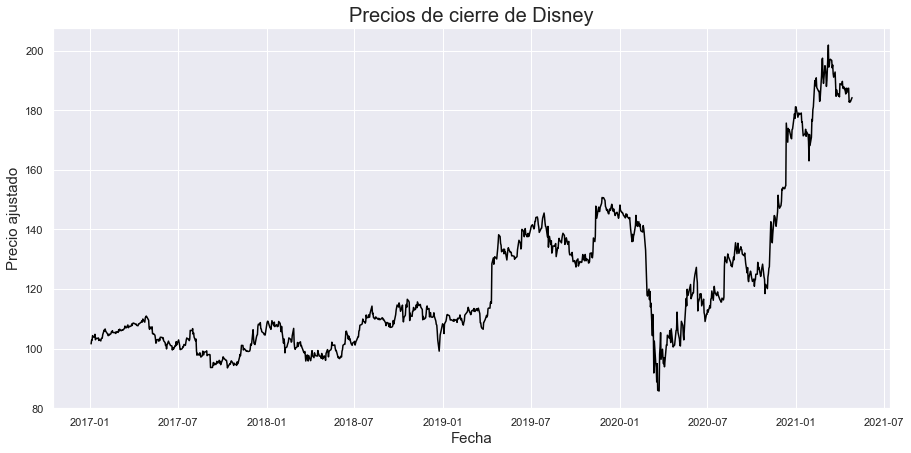

In [2]:
ticker = ["DIS"]
start_date = "2017-01-01"
closes_dis = get_adj_closes(ticker, start_date)
plt.figure(figsize = [15, 7])
plt.plot(closes_dis, color = "black")
plt.title("Precios de cierre de Disney", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Precio ajustado", fontsize = 15)
plt.show()

Graficar rendimientos:

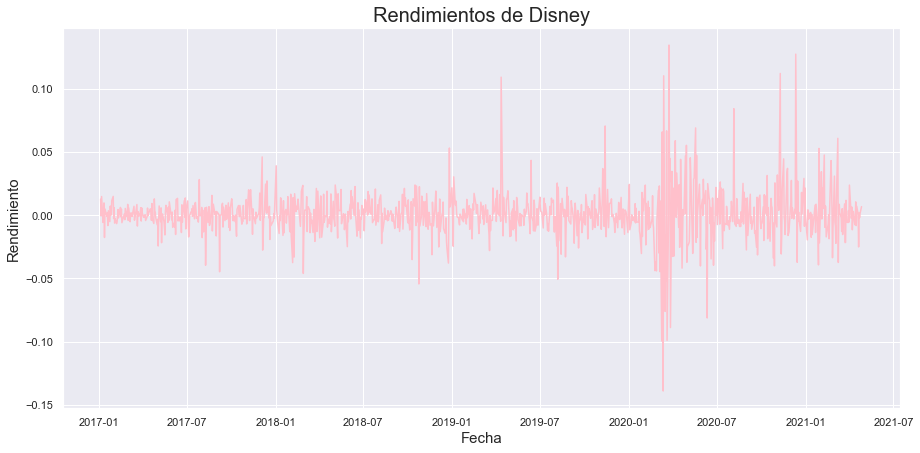

In [3]:
ret_dis = calc_daily_ret(closes_dis)
plt.figure(figsize = [15, 7])
plt.plot(ret_dis, color = "pink")
plt.title("Rendimientos de Disney", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Rendimiento", fontsize = 15)
plt.show()

Obtener los datos de las opciones:

In [4]:
dis = web.YahooOptions("DIS")
dis_opt = dis.get_all_data().reset_index()
dis_opt.set_index("Expiry").sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,177.5,call,DIS210430C00177500,...,2021-04-26 20:03:01,2021-04-26 19:17:36,"{'contractSymbol': 'DIS210430C00177500', 'stri..."
2021-04-30,172.5,call,DIS210430C00172500,...,2021-04-26 20:03:01,2021-04-26 18:28:24,"{'contractSymbol': 'DIS210430C00172500', 'stri..."
2021-04-30,222.5,call,DIS210430C00222500,...,2021-04-26 20:03:01,2021-04-22 17:23:45,"{'contractSymbol': 'DIS210430C00222500', 'stri..."
2021-04-30,225.0,call,DIS210430C00225000,...,2021-04-26 20:03:01,2021-04-21 19:12:30,"{'contractSymbol': 'DIS210430C00225000', 'stri..."
2021-04-30,205.0,call,DIS210430C00205000,...,2021-04-26 20:03:01,2021-04-26 19:09:18,"{'contractSymbol': 'DIS210430C00205000', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,80.0,put,DIS230120P00080000,...,2021-04-26 20:03:01,2021-04-15 14:58:55,"{'contractSymbol': 'DIS230120P00080000', 'stri..."
2023-01-20,130.0,put,DIS230120P00130000,...,2021-04-26 20:03:01,2021-04-23 15:13:38,"{'contractSymbol': 'DIS230120P00130000', 'stri..."
2023-01-20,230.0,put,DIS230120P00230000,...,2021-04-26 20:03:01,2021-04-21 16:41:58,"{'contractSymbol': 'DIS230120P00230000', 'stri..."


Fijar un precio Strike y una fecha de expiración del contrato:

In [5]:
K = 290 # Strike price
indice_opt = dis_opt.loc[(dis_opt.Type == "put") & (dis_opt.Strike == K) & (dis_opt.Expiry == "2023-01-20")]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
873,290.0,2023-01-20,put,...,2021-04-26 20:03:01,2021-04-19 15:01:33,"{'contractSymbol': 'DIS230120P00290000', 'stri..."


Ver datos de la opción que se encontró:

In [6]:
i_opt = indice_opt.index
opcion_valuar = dis_opt.loc[i_opt[0]]
opcion_valuar["JSON"]

{'contractSymbol': 'DIS230120P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 106.6,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 18,
 'bid': 108.8,
 'ask': 110.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1618844493,
 'impliedVolatility': 0.29114478393554677,
 'inTheMoney': True}

In [7]:
print("El precio actual del activo subyacente (acciones de Disney) es " + str(opcion_valuar.Underlying_Price) + ".")

El precio actual del activo subyacente (acciones de Disney) es 184.27.


No se tomará la media sino la tasa libre de riesgo de $0.07 \%$, basada en el bono a un año del tesoro de *Estados Unidos* debido a que se hace una valoración neutral al riesgo. Además, los precios van desde hoy hasta la fecha `Expiry`:

In [29]:
mu = ret_dis.mean()[0]
sigma = ret_dis.std()[0]
r = 0.0007 / 360 # tasa diaria libre de riesgo
today = pd.Timestamp(datetime.date.today())
expiry = opcion_valuar.Expiry
T = expiry - today
print("La media de los rendimientos de Disney es " + str(mu) + ".")
print("La desviación estándar de los rendimientos de Disney es " + str(sigma) + ".")
print("La tasa libre de riesgo es " + str(r) + ".")
print("El tiempo que le resta de vida T a la opción de Disney es " + str(T) + ".")

La media de los rendimientos de Disney es 0.0005493658005664091.
La desviación estándar de los rendimientos de Disney es 0.018691537896022743.
La tasa libre de riesgo es 1.9444444444444444e-06.
El tiempo que le resta de vida T a la opción de Disney es 634 days 00:00:00.


**Valuación usando el modelo de Black Scholes**:

Los supuestos son los siguientes:
1. El comportamiento del precio de la acción corresponde al modelo logarítmico normal, con $\mu$ y $\sigma$ constantes.
2. No hay costos de transición ni impuestos. Todos los títulos son perfectamente divisibles.
3. No hay dividendos sobre la acción durante la vida de la opción.
4. No hay oportunidades de arbitraje libres de riesgo.
5. La negociación de valores es continua.
6. Los inversionistas pueden adquirir u otorgar préstamos a la misma tasa de interés libre de riesgo.
7. La tasa de interés libre de riesgo a corto plazo, r, es constante.

El valor actual de la opción es:
$$ \text{Valor actual de la opción put} = V(S_0, T) = K e^{-r \cdot T} \cdot N(-d_2) - S_0 \cdot N(-d_1) $$

Donde:
- $S_0$ = precio de la acción en el momento actual.
- $K$ = precio "de ejercicio" de la opción.
- $r$ = tasa de interés libre de riesgo.
- $T$ = tiempo que le resta de vida a la opción.
- $N(d)$ = función de distribución de la variable aleatoria normal con media nula y desviación típica unitaria (probabilidad de que dicha variable sea menor o igual que d). Función de distribución de probabilidad acumulada.
- $\sigma$ = desviación estándar por período de la tasa o tipo de rendimiento de la opción.

Para calcular $d_1$ y $d_2$:
$$ d_1 = \frac{\ln{\frac{S_0}{K}} + (r + \frac{\sigma^2}{2}) \cdot T}{\sigma \sqrt{T}} = \frac{\ln{\frac{183.94}{290}} + (\frac{0.0007}{360} + \frac{0.018691087396090066^2}{2}) \cdot 634}{0.018691087396090066 \sqrt{634}} = -0.72943238429634$$
$$ d_2 = \frac{\ln{\frac{S_0}{K}} + (r - \frac{\sigma^2}{2}) \cdot T}{\sigma \sqrt{T}} = \frac{\ln{\frac{183.94}{290}} + (\frac{0.0007}{360} - \frac{0.018691087396090066^2}{2}) \cdot 634}{0.018691087396090066 \sqrt{634}} = -1.2000619395334$$

Para calcular $N(-d_1)$ y $N(-d_2)$ hay que ver en la tabla Z (que sirve para obtener las probabilidades acumuladas de las distribuciones normales estándar, con media igual a 0 y desviación estándar $\sigma$ igual a 1):
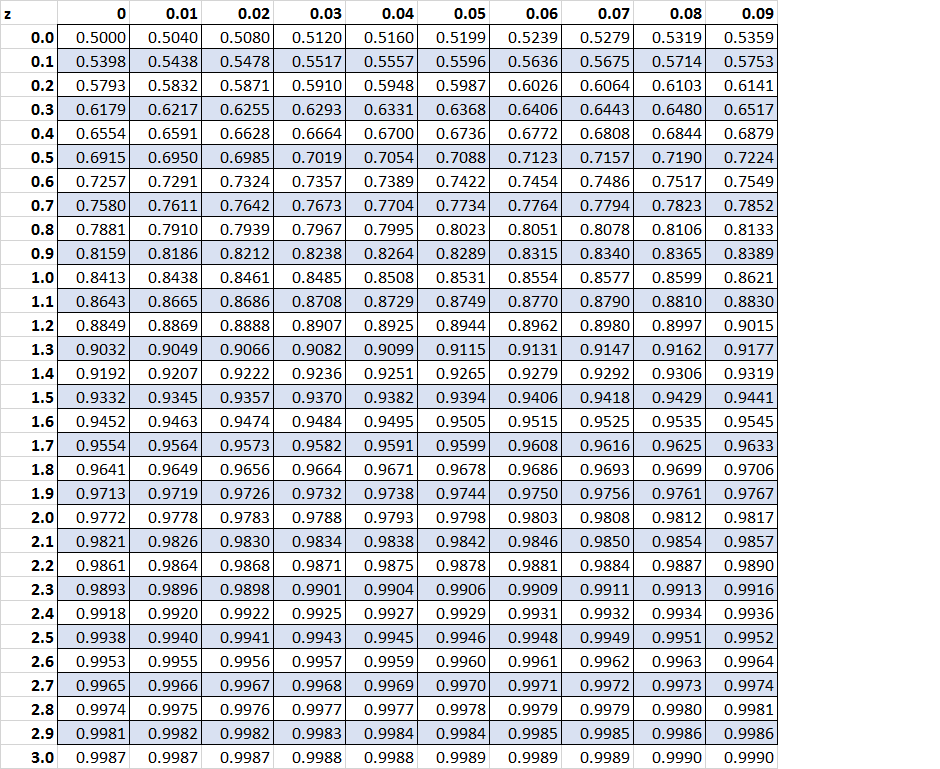

Entonces,
$$N(-d_1) = N(0.72943238429634)= 0.7642$ y $N(1.2000619395334) = 0.8849$$

Así, sustituyendo en la ecuación presentada anteriormente,
$$ \text{Valor actual de la opción} = V(184.27, 634) = 290 e^{-\frac{0.0007}{360} \cdot 634} \cdot 0.8849 - 184.27 \cdot 0.7642 = 115.486 $$

Con este resultado analítico, se podría concluir que según el modelo de Black-Scholes, la opción de Disney está **infravalorada**, pues la valuación resulta en un precio mayor que el precio actual. Esto podría indicar que a un inversor le conviene comprar esta opción de venta.

Las siguientes simulaciones se realizan con 10,000 escenarios aleatorios con el objetivo de obtener una valuación de la *opción de venta* acertada Recordar que la función de pago de las opciones de venta son el precio *strike* menos el precio *spot*. Además se utilizan opciones plan vainilla (europeas).

Se asume que los rendimientos tienen una distribución normal (así dice la teoría) y se hace la simulación:

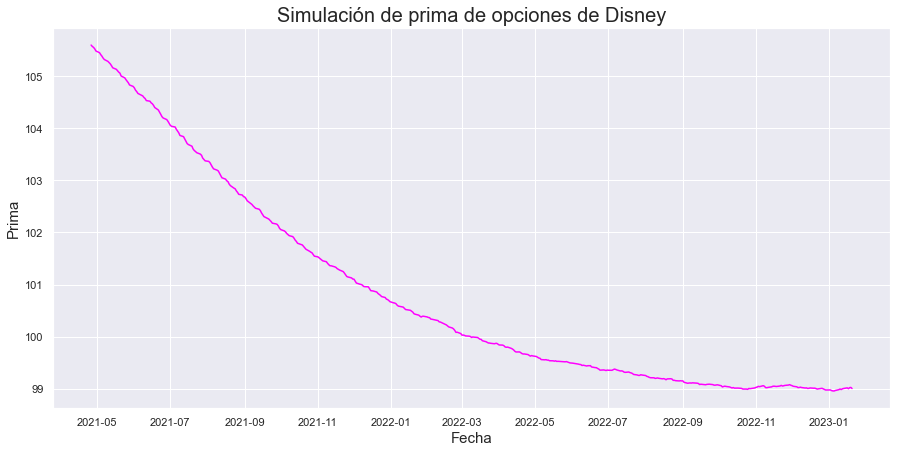

In [9]:
# Tasa de bonos de 1 año de la fecha 04 / 25 / 21 -> 0.070%
np.random.seed(1234) # semilla
K = opcion_valuar["JSON"]["strike"] # strike price
dates = pd.date_range(start = today, end = expiry, freq = "B") # fechas a simular 'bussiness days'
ndays = len(dates) # número de días
nscen = 100000 # número de escenarios
S0 = closes_dis.iloc[-1, 0] # condición inicial del precio a simular 
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays, nscen) + r, index = dates) # simular rendimientos
sim_closes = S0 * np.exp(sim_ret.cumsum()) # simular precios
strike = pd.DataFrame(K * np.ones([ndays, nscen]), index = dates) # frame con el valor del strike
put = pd.DataFrame({"Prima": np.exp(-r * ndays) * np.fmax(strike - sim_closes, 0).mean(axis = 1)}, index = dates) # valor de put
plt.figure(figsize = [15, 7])
plt.plot(put, color = "magenta")
plt.title("Simulación de prima de opciones de Disney", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show()

Mostrar 10 escenarios:

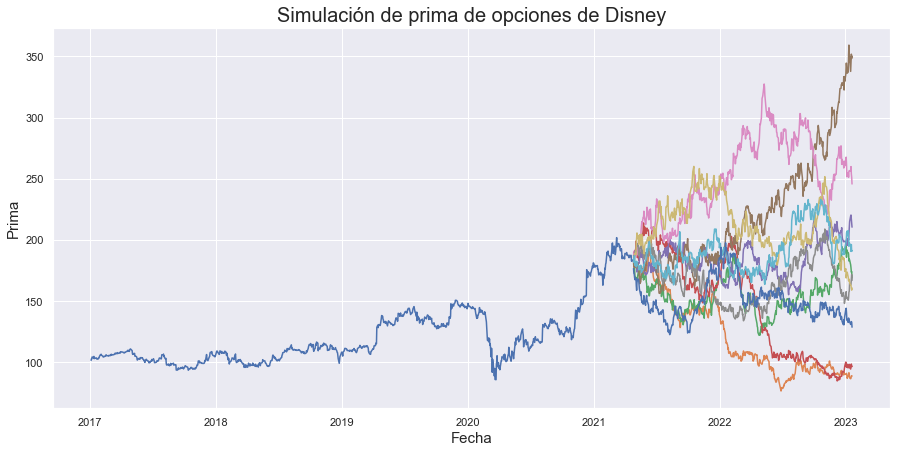

In [10]:
plt.figure(figsize = [15, 7]) # simulación de montecarlo
sim_normal = pd.concat([closes_dis, sim_closes[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])
plt.plot(sim_normal)
plt.title("Simulación de prima de opciones de Disney", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show();

Mostrar la valuación de la opción según la simulación:

In [11]:
put.iloc[-1] # valuación de la opción

Prima    99.002
Name: 2023-01-20 00:00:00, dtype: float64

Se escoge un valor de alpha $\alpha$ (nivel de significancia) de 0.05; es decir, se elige un nivel de confianza de 0.95 para valuar la opción:

In [12]:
confianza = 0.95 # intervalo de confianza
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc = mean_est, scale = sigma_est)
print("Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza", i2)

Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza (98.48620870104261, 99.51872490610182)


In [13]:
opcion_valuar["JSON"] # ver lastprice y compararlo con la valuación anterior

{'contractSymbol': 'DIS230120P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 106.6,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 18,
 'bid': 108.8,
 'ask': 110.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1618844493,
 'impliedVolatility': 0.29114478393554677,
 'inTheMoney': True}

El precio resultante de la valuación de la opción con la simulación es ligeramente menor que el *lastPrice*, lo cual significa que quizás la distribución normal no se ajusta perfectamente a los rendimientos.

**Aplicar reducción de varianza para ver si la valuación se ajusta mejor al *lastPrice*** con muestreo estratificado de N estratos igualmente espaciados:

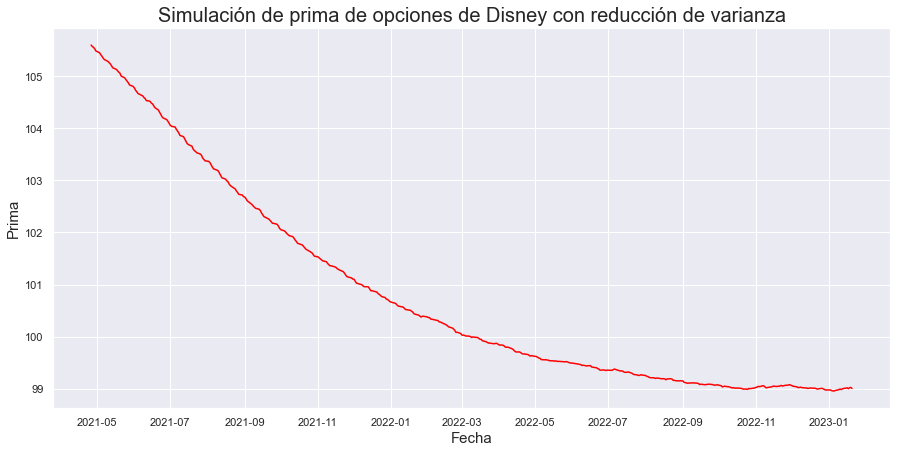

In [14]:
# Usando muestreo estratificado -> # estratros = nscen
np.random.seed(5555)
nscen = 50000 # menos escenarios por la reducción de varianza
U = (np.random.rand(ndays, nscen) + np.arange(0, nscen)) / nscen
Z = st.norm.ppf(U)
sim_ret2 = pd.DataFrame(sigma * Z + r, index = dates)
sim_closes2 = S0 * np.exp(sim_ret2.cumsum())
strike = pd.DataFrame(K * np.ones([ndays, nscen]), index = dates) # función de pago
put = pd.DataFrame({"Prima": np.exp(-r * ndays) * np.fmax(strike - sim_closes2, 0).T.mean()}, index = dates)
plt.figure(figsize = [15, 7])
plt.plot(put, color = "red")
plt.title("Simulación de prima de opciones de Disney con reducción de varianza", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show()

Graficar 10 escenarios de la simulación:

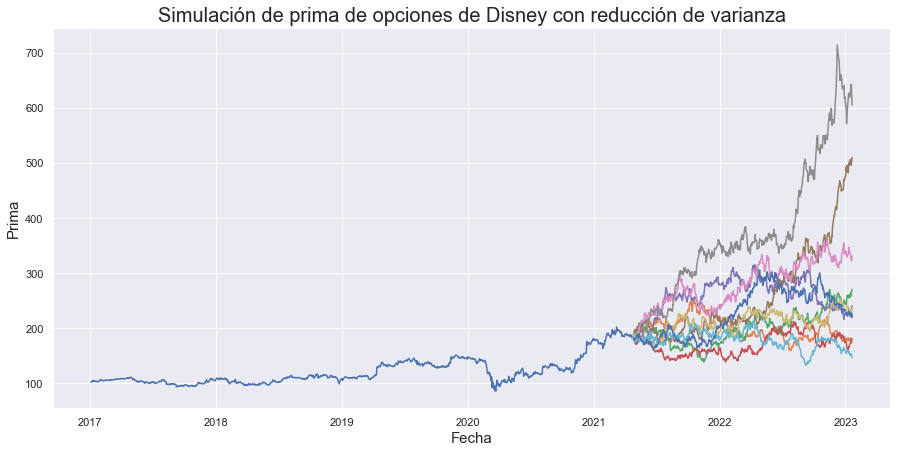

In [15]:
plt.figure(figsize = [15, 7]) # simulación de montecarlo
sim_reduc = pd.concat([closes_dis, sim_closes2[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]])
plt.plot(sim_reduc)
plt.title("Simulación de prima de opciones de Disney con reducción de varianza", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show();

Mostrar la valuación de la opción según la simulación:

In [16]:
put.iloc[-1] # valuación de la opción

Prima    99.002
Name: 2023-01-20 00:00:00, dtype: float64

Se escoge un valor de alpha  𝛼  (nivel de significancia) de 0.05; es decir, se elige un nivel de confianza de 0.95 para valuar la opción:

In [17]:
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc = mean_est, scale = sigma_est)
print("Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza", i2)

Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza (98.48620870104261, 99.51872490610182)


In [18]:
opcion_valuar["JSON"] # ver lastprice y compararlo con la valuación anterior

{'contractSymbol': 'DIS230120P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 106.6,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 18,
 'bid': 108.8,
 'ask': 110.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1618844493,
 'impliedVolatility': 0.29114478393554677,
 'inTheMoney': True}

El precio resultante de la valuación de la opción con la simulación con reducción de varianza es ligeramente menor que el *lastPrice* y es igual al de la simulación sin reducción de varianza, lo cual significa que quizás la distribución normal no se ajusta perfectamente a los rendimientos y que la reducción de varianza no tiene efectos significativos.

**Valuación usando el histograma de los rendimientos** con gráfica cuantil cuantil y una distribución `t`:

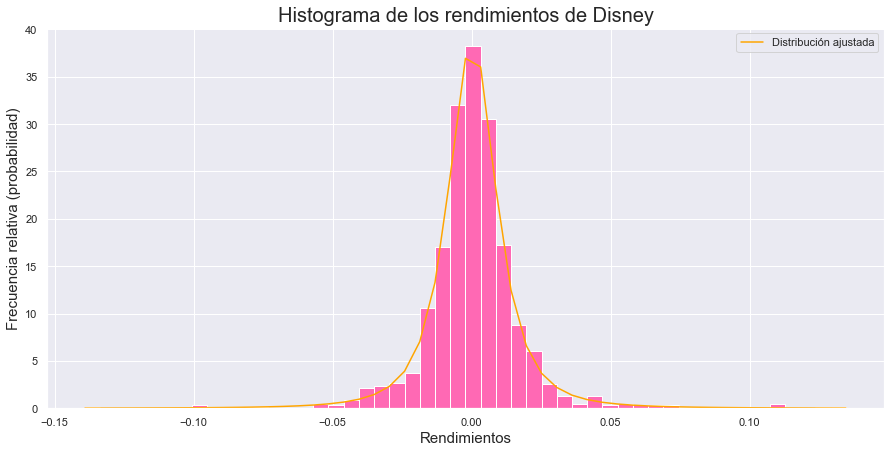

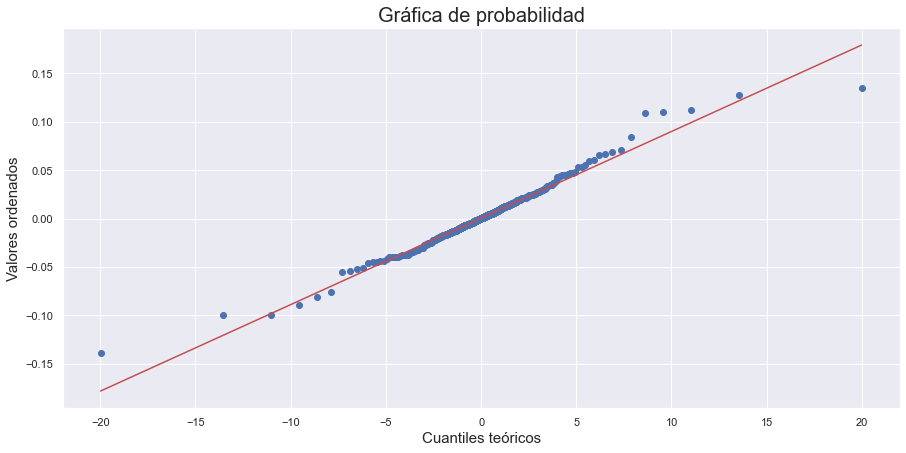

In [19]:
ren = calc_daily_ret(closes_dis) # rendimientos
plt.figure(figsize = [15, 7])
y, x, _ = plt.hist(ren["DIS"], bins = 50, density = True, color = "hotpink") # histograma de los rendimientos
dist = "t" # ajustar los parámetros a una distribución
params = getattr(st, dist).fit(ren.values) 
curve_fit = getattr(st, dist).pdf(x, *params) # generar la pdf de la distribución ajustada con los parámetros encontrados
plt.plot(x, curve_fit, label = "Distribución ajustada", color = "orange")
plt.title("Histograma de los rendimientos de Disney", fontsize = 20)
plt.xlabel("Rendimientos", fontsize = 15)
plt.ylabel("Frecuencia relativa (probabilidad)", fontsize = 15)
plt.legend()
plt.show()
plt.figure(figsize = [15, 7])
st.probplot(ren["DIS"], sparams = params[:-2], dist = dist, plot = plt); # gráfica Q-Q
plt.title("Gráfica de probabilidad", fontsize = 20)
plt.xlabel("Cuantiles teóricos", fontsize = 15)
plt.ylabel("Valores ordenados", fontsize = 15)
plt.show()

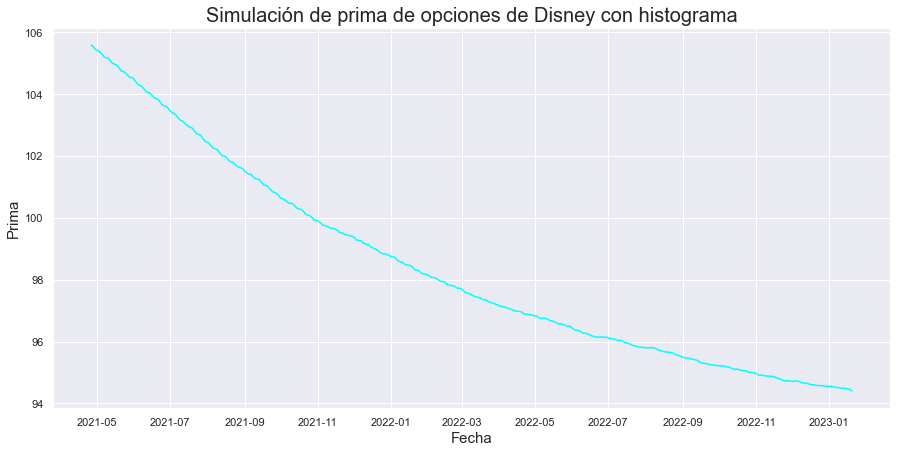

In [20]:
np.random.seed(1234) # semilla
K = opcion_valuar["JSON"]["strike"]
nscen = 100000
ndays = len(dates)
freq, values = np.histogram(ret_dis + r - mu, bins = 2000) # histograma tomando la tasa libre de riesgo
prob = freq / np.sum(freq)
ret = np.random.choice(values[1:], ndays * nscen, p = prob) # simulación de los rendimientos
sim_ret_hist = pd.DataFrame(ret.reshape((ndays, nscen)), index = dates) # simulación de precios
sim_closes_hist = (closes_dis.iloc[-1, 0]) * np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K * np.ones(ndays * nscen).reshape((ndays, nscen)), index = dates)
put_hist = pd.DataFrame({"Prima": np.exp(-r * ndays) * np.fmax(strike - sim_closes_hist, 0).T.mean()}, index = dates)

plt.figure(figsize = [15, 7])
plt.plot(put_hist, color = "cyan")
plt.title("Simulación de prima de opciones de Disney con histograma", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show();

Mostrar 10 escenarios:

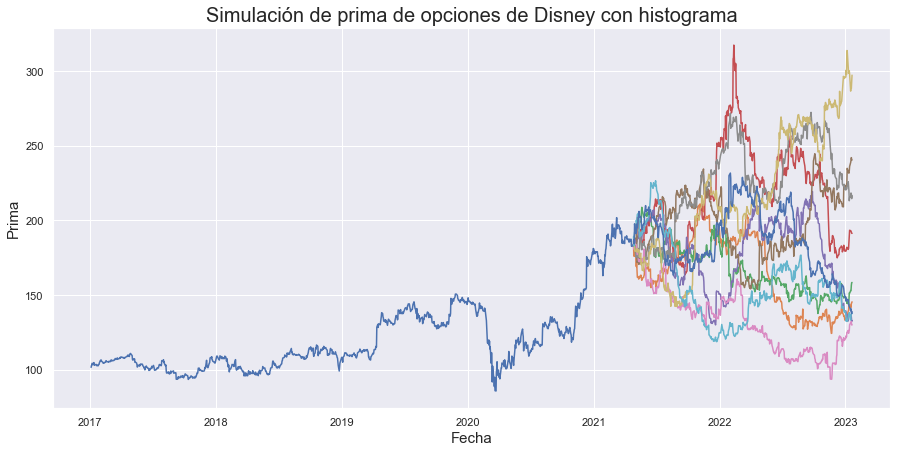

In [21]:
plt.figure(figsize = [15, 7]) # simulación de montecarlo
sim_hist = pd.concat([closes_dis, sim_closes_hist[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])
plt.plot(sim_hist)
plt.title("Simulación de prima de opciones de Disney con histograma", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.show();

Mostrar la valuación de la opción según la simulación:

In [22]:
put_hist.iloc[-1] # valuación de la opción

Prima    94.4
Name: 2023-01-20 00:00:00, dtype: float64

Se escoge un valor de alpha  𝛼  (nivel de significancia) de 0.05; es decir, se elige un nivel de confianza de 0.95 para valuar la opción:

In [23]:
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc = mean_est, scale = sigma_est)
print("Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza", i2)

Con un 95% de confianza, el valor de la opción de Disney está dentro del intervalo de confianza (93.86497627154125, 94.93478768850179)


In [24]:
opcion_valuar["JSON"] # ver lastprice y compararlo con la valuación anterior

{'contractSymbol': 'DIS230120P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 106.6,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 18,
 'bid': 108.8,
 'ask': 110.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1618844493,
 'impliedVolatility': 0.29114478393554677,
 'inTheMoney': True}

El precio resultante de la valuación de la opción con la simulación con un histograma se asemeja al *lastPrice*, sin embargo las simulaciones anteriores se ajustan mejor.

La conclusión final, es que si bien de acuerdo a valuación analítica con el modelo de Black Scholes la opción de venta de Disney está infravalorada (lo que indica que es buena idea comprarla), **las simulaciones previas indican que está sobrevalorada** porque el precio de la valuación siempre da menor que el *lastPrice* (lo que indica que es buena idea venderla). Si bien estas valuaciones son contradictorias, es muy probable que ninguna sea acertada, pues se sabe que en un mercado de competencia perfecta y con información simétrica, no hay oportunidad de que ocurra arbitraje (porque en ese caso todos los inversores en conjunto, mantendrían el precio de mercado siempre en equilibrio). Por lo tanto, no es conveniente sacar conclusiones con base en este modelo sobre si es mejor "comprar" o "vender".